In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from tqdm import tqdm

import os
import sys
sys.path.append(os.path.join(os.path.abspath(''), '..'))
from utils.dla import get_neighbors, new_start, next_aggregation, radius_of_gyration

100%|██████████| 1000/1000 [01:16<00:00, 13.12it/s]


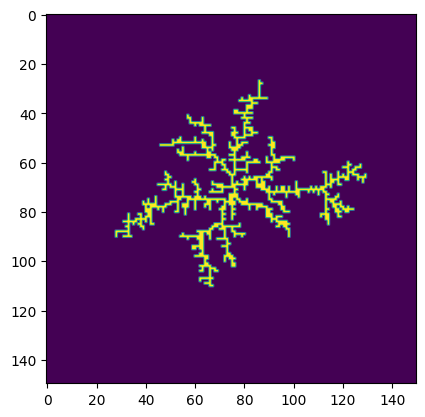

In [2]:
aggragations = 1000
size = 150

grid = np.zeros((size,size))
grid[size//2, size//2] = 1

start = new_start(grid)
neighbors = get_neighbors(grid)

grid_list = []
n_neighbors = []
gyrations = []

for i in tqdm(range(aggragations)):
    grid_list.append(grid.copy())
    n_neighbors.append(((neighbors + grid) > 0).sum() - (grid > 0).sum())
    
    grid[*next_aggregation(start, neighbors)] = 1
    start = new_start(grid)
    neighbors = get_neighbors(grid)
    gyrations.append(radius_of_gyration(grid))

plt.imshow(grid);

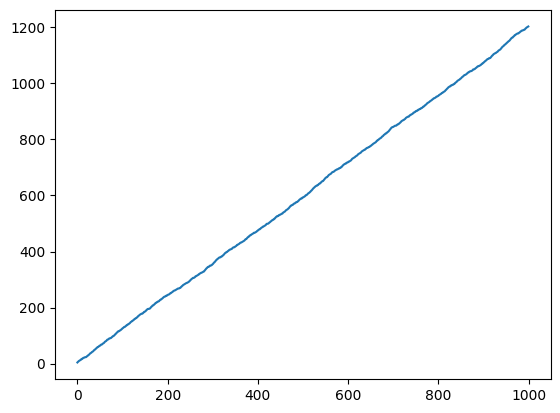

Slope: 1.196078618078618


In [6]:
plt.plot(n_neighbors)
plt.show()

print(f'Slope: {np.polyfit(range(len(n_neighbors)), n_neighbors, 1)[0]}')

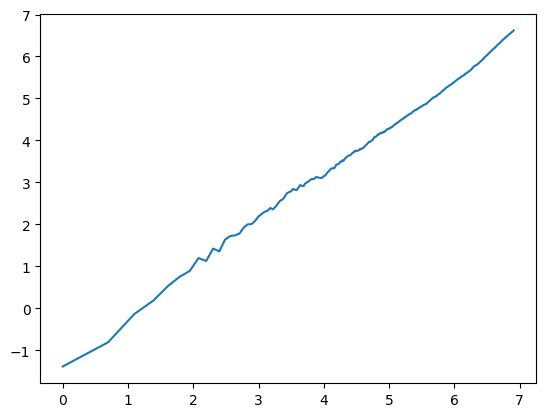

Slope: 1.4498985637538693


In [7]:
x = np.arange(len(gyrations)) + 1
plt.plot(np.log(x), np.log(gyrations))
plt.show()

print('Slope:', np.polyfit(np.log(x[aggragations//2:]), np.log(gyrations[aggragations//2:]), 1)[0])

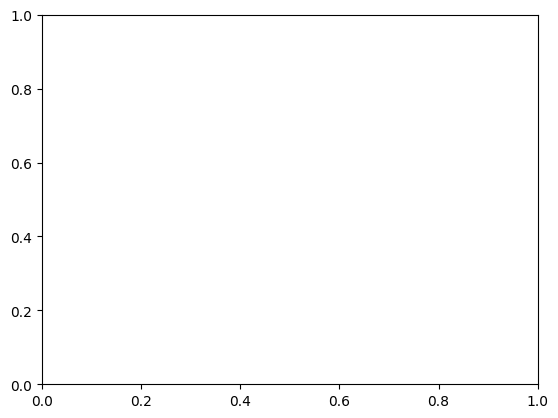

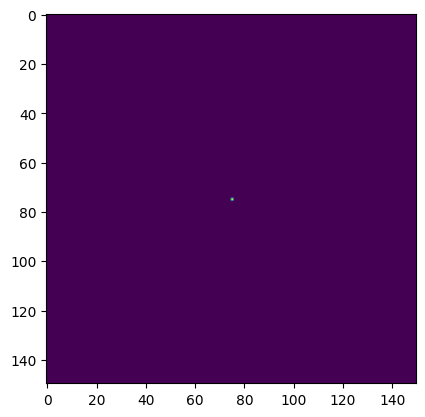

In [5]:
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    ax.imshow(grid_list[5*i])

fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update, frames=200, interval=5)

writer = animation.PillowWriter()
ani.save(f'../images/animation.gif', writer=writer)